### Name：Liaoliao Wei
### Github Username：Lillian1026
### USC ID：9205564620

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Part 1

In [2]:
df=pd.read_excel("../data/Folds5x2_pp.xlsx")

In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


## (b)Exploring the data

### (bi) Rows and columns

In [4]:
print('The number of rows: ', df.shape[0])
print('The number of columns: ', df.shape[1])

The number of rows:  9568
The number of columns:  5


In [5]:
print('What do the rows and columns represent? ') 
print('Rows: How many samples/records the dataset has')
print('Columns: How many variables (4 independent variables and 1 dependent variable) it has')

What do the rows and columns represent? 
Rows: How many samples/records the dataset has
Columns: How many variables (4 independent variables and 1 dependent variable) it has


### (bii) Pairwise scatterplots

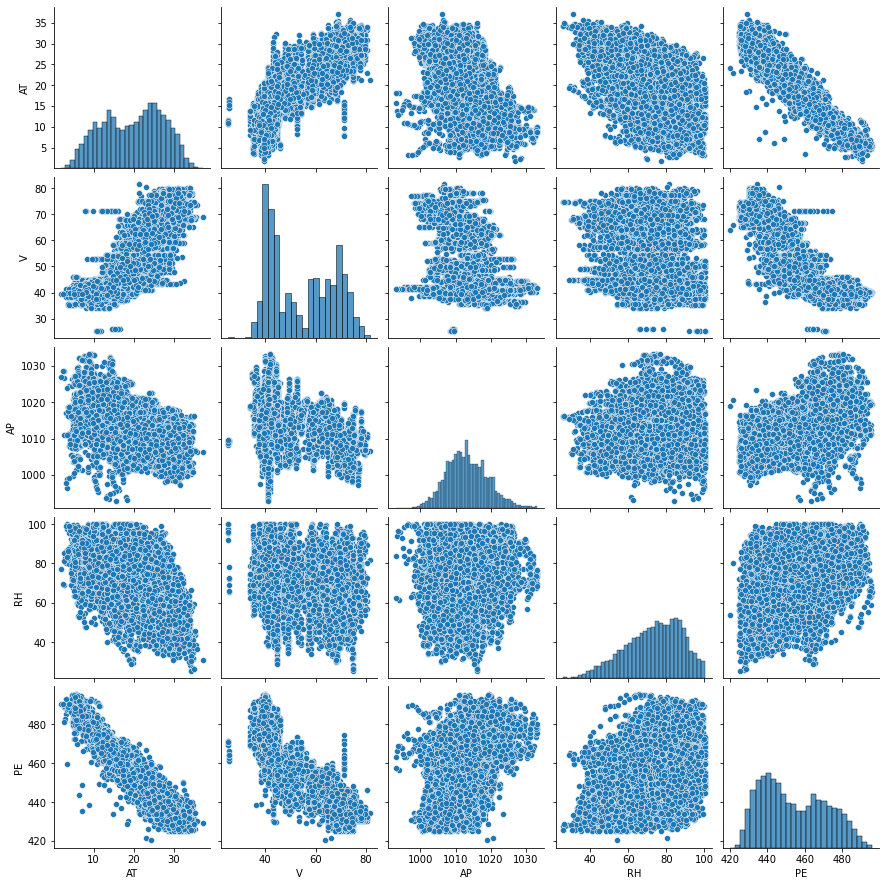

In [6]:
sns.pairplot(df)

Describe your findings:

1. Features temperature and exhaust vacuum may have a linear correlation with the dependent variable net hourly electrical energy output.
2. Temperature and exhaust vacuum seems like related with each other.

### (biii) Mean, median, range, quartiles

In [7]:
df_stats=df.describe()

In [8]:
df_stats.loc['medium']=df_stats.loc['50%']
df_stats.loc['range']=df_stats.loc['max']-df_stats.loc['min']
df_stats.loc['interquartile ranges']=df_stats.loc['75%']-df_stats.loc['25%']
df_stats

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
medium,20.345000,52.080000,1012.940000,74.975000,451.550000
range,35.300000,56.200000,40.410000,74.600000,75.500000


## (c) Linear regression for each predictor

### AT & PE

In [9]:
#model
X_at=df['AT']
y=df['PE']
X_m_at=sm.add_constant(X_at)
model_at=sm.OLS(y, X_m_at).fit()
model_at.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:14:37   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#predict
y_predict=model_at.predict()

#### Conclusion

Since p<0.05 (p=0.000), there is a statistically significant correlation between temperature and net hourly electrical energy output

#### Plot

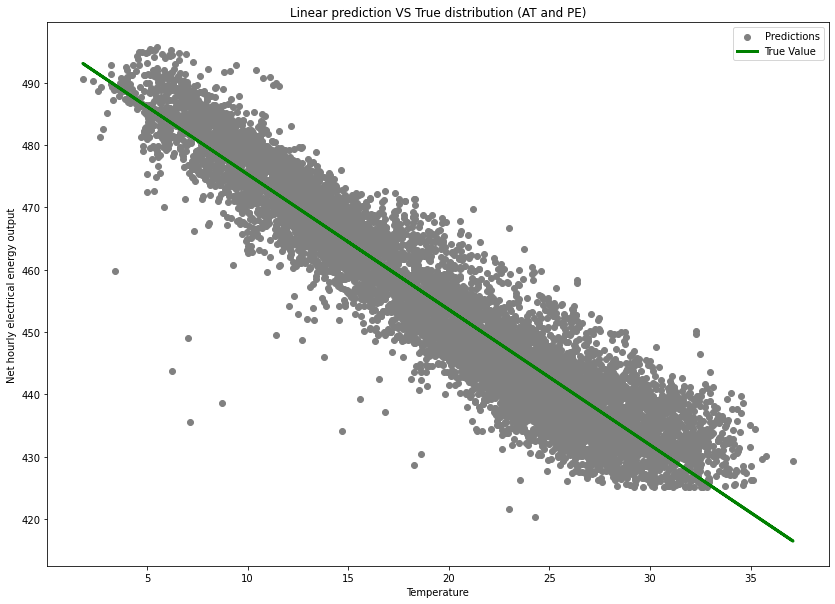

In [11]:
plt.figure(figsize=(14, 10))
plt.scatter(X_at, y, color="Grey")
plt.plot(X_at, y_predict, color="Green", linewidth=3)
plt.title('Linear prediction VS True distribution (AT and PE)')
plt.xlabel('Temperature')
plt.ylabel('Net hourly electrical energy output')

plt.legend(['Predictions','True Value'], loc='upper right')
plt.show()

#### Outliers

In [12]:
rst=OLSInfluence(model_at).summary_frame().student_resid
print(f'There are {sum(abs(rst) > 3)} outliers in AT.')

There are 42 outliers in AT.


### V & PE

In [13]:
#model
X_v=df['V']
y=df['PE']
X_m_v=sm.add_constant(X_v)
model_v=sm.OLS(y, X_m_v).fit()
model_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:14:49   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.000     517.061     518.542
V             -1.1681      0.007   -172.402      0.000      -1.181      -1.155
==============================================================================
Omnibus:                       77.693   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.571
Skew:                          -0.097   Prob(JB):                     1.61e-24
Kurtosis:                       3.487   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#predict
y_predict=model_v.predict()

#### Conclusion

Since p<0.05 (p=0.000), there is a statistically significant correlation between exhaust vacuum and net hourly electrical energy output

#### Plot

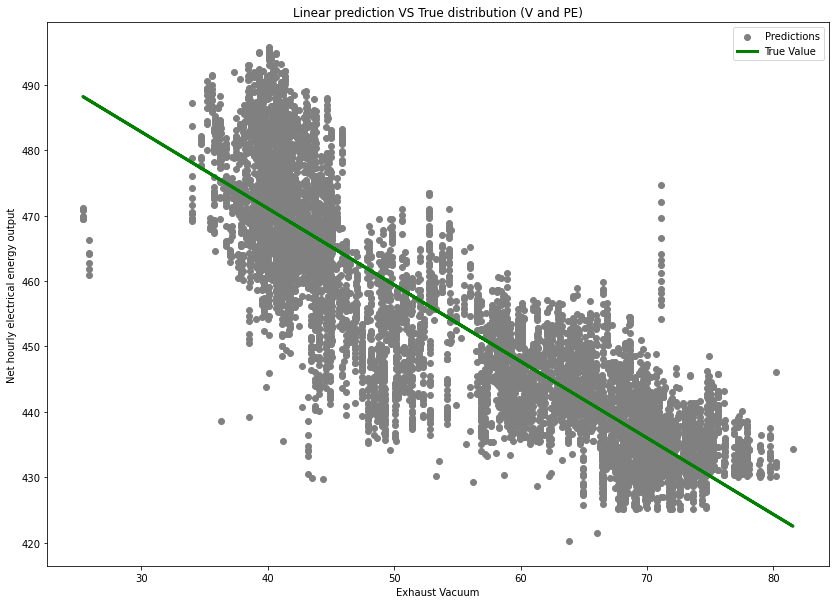

In [15]:
plt.figure(figsize=(14, 10))
plt.scatter(X_v, y, color="Grey")
plt.plot(X_v, y_predict, color="Green", linewidth=3)
plt.title('Linear prediction VS True distribution (V and PE)')
plt.xlabel('Exhaust Vacuum')
plt.ylabel('Net hourly electrical energy output')

plt.legend(['Predictions','True Value'], loc='upper right')
plt.show()

#### Outliers

In [16]:
rst=OLSInfluence(model_v).summary_frame().student_resid
print(f'There are {sum(abs(rst) > 3)} outliers in V.')

There are 33 outliers in V.


### AP & PE

In [17]:
#model
X_ap=df['AP']
y=df['PE']
X_m_ap=sm.add_constant(X_ap)
model_ap=sm.OLS(y, X_m_ap).fit()
model_ap.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:01   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539
==============================================================================
Omnibus:                      525.438   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.290
Skew:                           0.616   Prob(JB):                    1.10e-133
Kurtosis:                       2.859   Cond. No.                     1.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#predict
y_predict=model_ap.predict()

#### Conclusion

Since p<0.05 (p=0.000), there is a statistically significant correlation between ambient pressure and net hourly electrical energy output

#### Plot

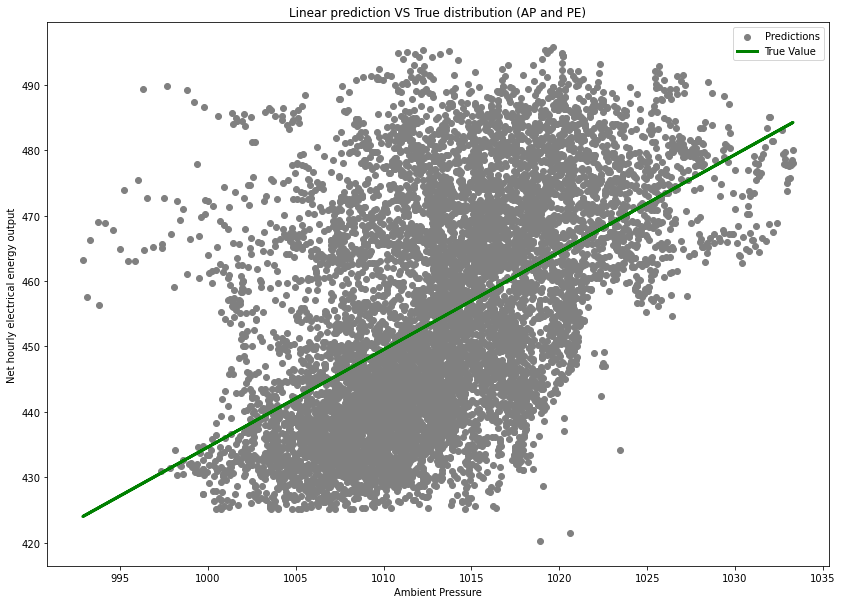

In [19]:
plt.figure(figsize=(14, 10))
plt.scatter(X_ap, y, color="Grey")
plt.plot(X_ap, y_predict, color="Green", linewidth=3)
plt.title('Linear prediction VS True distribution (AP and PE)')
plt.xlabel('Ambient Pressure')
plt.ylabel('Net hourly electrical energy output')

plt.legend(['Predictions','True Value'], loc='upper right')
plt.show()

#### Outliers

In [20]:
rst=OLSInfluence(model_ap).summary_frame().student_resid
print(f'There are {sum(abs(rst) > 3)} outliers in AP.')

There are 30 outliers in AP.


### RH & PE

In [21]:
#model
X_rh=df['RH']
y=df['PE']
X_m_rh=sm.add_constant(X_rh)
model_rh=sm.OLS(y, X_m_rh).fit()
model_rh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:13   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.000     419.349     422.574
RH             0.4557      0.011     41.399      0.000       0.434       0.477
==============================================================================
Omnibus:                      772.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.245
Skew:                           0.231   Prob(JB):                     4.75e-70
Kurtosis:                       2.234   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#predict
y_predict=model_rh.predict()

#### Conclusion

Since p<0.05 (p=0.000), there is a statistically significant correlation between relative humidity and net hourly electrical energy output

#### Plot

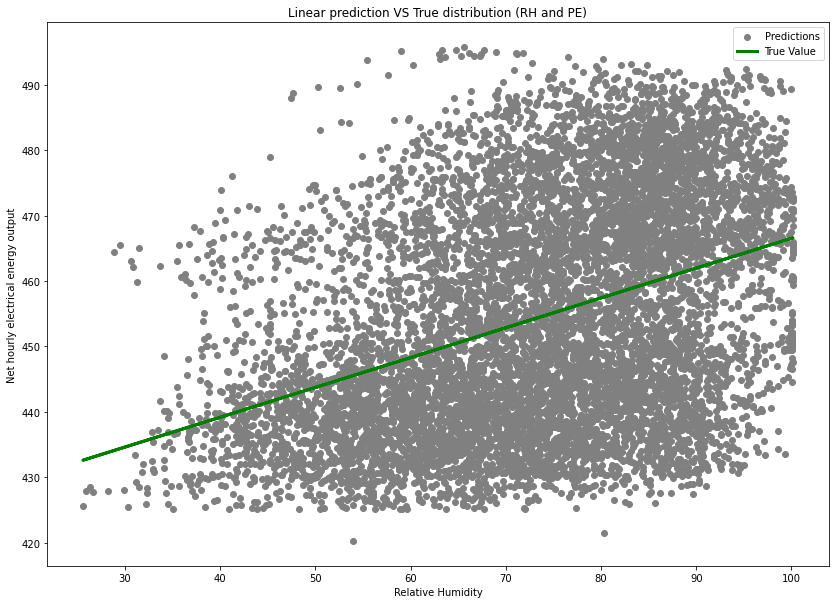

In [23]:
plt.figure(figsize=(14, 10))
plt.scatter(X_rh, y, color="Grey")
plt.plot(X_rh, y_predict, color="Green", linewidth=3)
plt.title('Linear prediction VS True distribution (RH and PE)')
plt.xlabel('Relative Humidity')
plt.ylabel('Net hourly electrical energy output')

plt.legend(['Predictions','True Value'], loc='upper right')
plt.show()

#### Outliers

In [24]:
rst=OLSInfluence(model_rh).summary_frame().student_resid
print(f'There are {sum(abs(rst) > 3)} outliers in RH.')

There are 2 outliers in RH.


## (d) Multiple regression model

#### Desribe your results

In [25]:
X_all=df[['AT','V','AP','RH']]
y=df['PE']
X_m_all=sm.add_constant(X_all)
model_all=sm.OLS(y, X_m_all).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:25   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Temperature (T), ambient pressure (AP), relative humidity (RH) and exhaust vacuum (V) all have a significant correletion with the net hourly electrical energy output (EP) of the plant. Among them, only AP has the significantly positive relationship with EP.

#### For which predictors can we reject the null hypothesis H0 :βj =0?

All of the predictors can reject the null hypothesis because p=0.000

## (e) Plot displaying the univariate regression coefficients

In [26]:
cof_multi=pd.read_html(model_all.summary().tables[1].as_html(),header=0,index_col=0)[0]
cof_multi=cof_multi.iloc[1:,:1]
cof_multi

,coef
AT,-1.9775
V,-0.2339
AP,0.0621
RH,-0.1581


In [27]:
cof_at=pd.read_html(model_at.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[1:,:1]
cof_v=pd.read_html(model_v.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[1:,:1]
cof_ap=pd.read_html(model_ap.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[1:,:1]
cof_rh=pd.read_html(model_rh.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[1:,:1]

In [28]:
cof_sin=pd.concat([cof_at, cof_v, cof_ap, cof_rh])
cof_sin

,coef
AT,-2.1713
V,-1.1681
AP,1.4899
RH,0.4557


In [29]:
x_axis=pd.Series(cof_sin['coef'].values, index=['AT', 'V', 'AP', "RH"])
x_axis

AT   -2.1713
V    -1.1681
AP    1.4899
RH    0.4557
dtype: float64

In [30]:
y_axis=pd.Series(cof_multi['coef'].values, index=['AT', 'V', 'AP', "RH"])
y_axis

AT   -1.9775
V    -0.2339
AP    0.0621
RH   -0.1581
dtype: float64

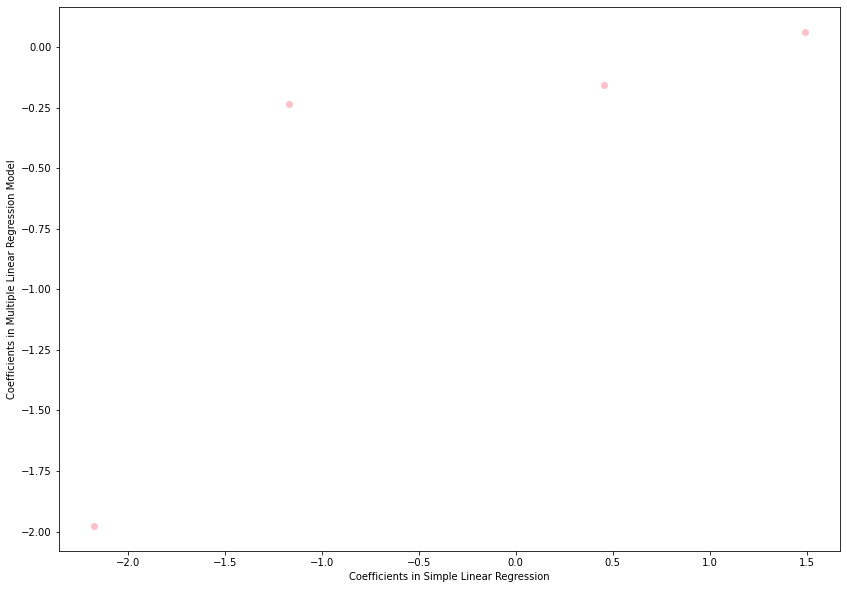

In [31]:
plt.figure(figsize=(14, 10))
plt.scatter(x_axis, y_axis, color='pink')
plt.xlabel('Coefficients in Simple Linear Regression')
plt.ylabel('Coefficients in Multiple Linear Regression Model')
plt.show()

## (f) Evidence of nonlinear association

In [32]:
poly=PolynomialFeatures(degree=3)

### AT & PE

In [33]:
X_at_poly=poly.fit_transform(np.array(X_at).reshape(-1,1))
X_m_at_poly=sm.add_constant(X_at_poly)
model_poly_at=sm.OLS(y, X_m_at_poly).fit()
model_poly_at.summary(xname=['const','AT','AT^2','AT^3'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:25   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.000     491.409     494.047
AT            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
AT^2          -0.1251      0.007    -18.199      0.000      -0.139      -0.112
AT^3           0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Conclusion

Since p<0.05, there is a nonlinear association between AT and PE

### V & PE

In [34]:
X_v_poly=poly.fit_transform(np.array(X_v).reshape(-1,1))
X_m_v_poly=sm.add_constant(X_v_poly)
model_poly_v=sm.OLS(y, X_m_v_poly).fit()
model_poly_v.summary(xname=['const','V','V^2','V^3'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:26   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.000     536.209     572.084
V             -2.1444      0.509     -4.214      0.000      -3.142      -1.147
V^2           -0.0027      0.009     -0.294      0.768      -0.021       0.015
V^3            0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Conclusion

Since the p-value of AT^2 and AT^3 larger than 0.05, there isn't nonlinear association between AT and PE.

### AP & PE

In [35]:
X_ap_poly=poly.fit_transform(np.array(X_ap).reshape(-1,1))
X_m_ap_poly=sm.add_constant(X_ap_poly)
model_poly_ap=sm.OLS(y, X_m_ap_poly).fit()
model_poly_ap.summary(xname=['const','AP','AP^2','AP^3'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:26   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.000       0.057       0.092
AP            25.2556      3.001      8.415      0.000      19.372      31.139
AP^2          -0.0500      0.006     -8.439      0.000      -0.062      -0.038
AP^3        2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Conclusion

Since p<0.05, there is a nonlinear association between AP and PE.

### RH & PE

In [36]:
X_rh_poly=poly.fit_transform(np.array(X_rh).reshape(-1,1))
X_m_rh_poly=sm.add_constant(X_rh_poly)
model_poly_rh=sm.OLS(y, X_m_rh_poly).fit()
model_poly_rh.summary(xname=['const','RH','RH^2','RH^3'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:26   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.000     447.744     489.083
RH            -1.7292      0.486     -3.557      0.000      -2.682      -0.776
RH^2           0.0321      0.007      4.433      0.000       0.018       0.046
RH^3          -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Conclusion

Since p<0.05, there is a nonlinear association between RH and PE.

## (g) Evidence of association of interactions of predictors with the response

In [37]:
interaction=PolynomialFeatures(degree=2,include_bias=True,interaction_only=True)
X_inter=interaction.fit_transform(X_all)
X_m_inter=sm.add_constant(X_inter)
model_inter=sm.OLS(y, X_m_inter).fit()
model_inter.summary(xname=['const','AT','V','AP','RH','AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:26   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT*V           0.0210      0.001     23.338      0.000       0.019       0.023
AT*AP          0.0018      0.002      0.752      0.452      -0.003       0.006
AT*RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
V*AP           0.0068      0.001      5.135      0.000       0.004       0.009
V*RH           0.0008      0.000      1.716      0.086      -0.000       0.002
AP*RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interaction terms that are statistically significant

1. AT * V
2. AT * RH
3. V * AP
4. AP * RH

## (h) Improve the model

### Train the regression model on a randomly selected 70% subset of the data with all predictors

In [38]:
y=df[['PE']]
X_train, X_test, y_train, y_test=train_test_split(X_all, y, train_size=0.7, test_size=0.3, random_state=1)

In [39]:
regr=linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred_multi_train=regr.predict(X_train)

In [41]:
mse_multi_train=mean_squared_error(y_train, y_pred_multi_train)
print('Train MSE: ', mse_multi_train)

Train MSE:  20.766119761450938


In [42]:
y_pred_multi_test=regr.predict(X_test)

In [43]:
mse_multi_test=mean_squared_error(y_test, y_pred_multi_test)
print('Test MSE: ', mse_multi_test)

Test MSE:  20.77747810688439


### Improve it with interaction terms and quadratic nonlinearities

In [44]:
df_multi=pd.DataFrame(columns=['AT', 'V', 'AP','RH',
                               'AT_V','AT_AP','AT_RH',
                               'V_AP','V_RH','AP_RH',
                               'AT^2','V^2','AP^2','RH^2'], 
                                index=np.arange(df.shape[0]))

In [45]:
at_v=np.array(df['AT']*df['V'])
at_ap=np.array(df['AT']*df['AP'])
at_rh=np.array(df['AT']*df['RH'])
v_ap=np.array(df['V']*df['AP'])
v_rh=np.array(df['V']*df['RH'])
ap_rh=np.array(df['AP']*df['RH'])
at_squ=np.array(df['AT']*df['AT'])
v_squ=np.array(df['V']*df['V'])
ap_squ=np.array(df['AP']*df['AP'])
rh_squ=np.array(df['RH']*df['RH'])

In [46]:
df_multi['AT']=df[['AT']]
df_multi['V']=df[['V']]
df_multi['AP']=df['AP']
df_multi['RH']=df['RH']
df_multi['AT_V']=at_v
df_multi['AT_AP']=at_ap
df_multi['AT_RH']=at_rh
df_multi['V_AP']=v_ap
df_multi['V_RH']=v_rh
df_multi['AP_RH']=ap_rh
df_multi['AT^2']=at_squ
df_multi['V^2']=v_squ
df_multi['AP^2']=ap_squ
df_multi['RH^2']=rh_squ

In [47]:
X_multi=df_multi
y_=df[['PE']]
X_multi=sm.add_constant(X_multi)
model_multi=sm.OLS(y, X_multi).fit()
model_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:26   Log-Likelihood:                -27431.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9553   BIC:                         5.500e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7503.7323   1207.276     -6.215      0.000   -9870.250   -5137.214
AT            -5.7969      3.092     -1.875      0.061     -11.858       0.264
V             -3.0443      1.498     -2.033      0.042      -5.980      -0.109
AP            15.6284      2.341      6.677      0.000      11.040      20.216
RH             3.9194      0.879      4.458      0.000       2.196       5.643
AT_V           0.0120      0.003      4.463      0.000       0.007       0.017
AT_AP          0.0031      0.003      1.037      0.300      -0.003       0.009
AT_RH         -0.0061      0.001     -4.056      0.000      -0.009      -0.003
V_AP           0.0026      0.001      1.765      0.078      -0.000       0.005
V_RH           0.0005      0.001      0.765      0.444      -0.001       0.002
AP_RH         -0.0036      0.001     -4.262      0.000      -0.005      -0.002
AT^2           0.0163      0.003      5.307      0.000       0.010       0.022
V^2           -0.0013      0.001     -1.606      0.108      -0.003       0.000
AP^2          -0.0076      0.001     -6.706      0.000      -0.010      -0.005
RH^2          -0.0019      0.000     -7.256      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1629.849   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11134.924
Skew:                          -0.642   Prob(JB):                         0.00
Kurtosis:                       8.127   Cond. No.                     2.86e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Move AT * AP, V * AP, V * RH, V^2

In [48]:
X_imp=df_multi.drop(columns=['AT_AP', 'V_AP','V_RH','V^2'])

In [49]:
X_imp

,AT,V,AP,RH,AT_V,AT_RH,AP_RH,AT^2,AP^2,RH^2
0,14.96,41.76,1024.07,73.17,624.7296,1094.6232,74931.2019,223.8016,1.048719e+06,5353.8489
1,25.18,62.96,1020.04,59.08,1585.3328,1487.6344,60263.9632,634.0324,1.040482e+06,3490.4464
2,5.11,39.40,1012.16,92.14,201.3340,470.8354,93260.4224,26.1121,1.024468e+06,8489.7796
3,20.86,57.32,1010.24,76.64,1195.6952,1598.7104,77424.7936,435.1396,1.020585e+06,5873.6896
4,10.82,37.50,1009.23,96.62,405.7500,1045.4284,97511.8026,117.0724,1.018545e+06,9335.4244
...,...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,827.3385,1515.1500,92274.9100,277.2225,1.028216e+06,8281.0000
9564,13.19,39.18,1023.67,66.78,516.7842,880.8282,68360.6826,173.9761,1.047900e+06,4459.5684
9565,31.32,74.33,1012.92,36.48,2328.0156,1142.5536,36951.3216,980.9424,1.026007e+06,1330.7904
9566,24.48,69.45,1013.86,62.39,1700.1360,1527.3072,63254.7254,599.2704,1.027912e+06,3892.5121


In [50]:
X_imp_train, X_imp_test, y_imp_train, y_imp_test=train_test_split(X_imp, y, train_size=0.7, test_size=0.3, random_state=1)

In [51]:
X=sm.add_constant(X_imp_train)
model_imp=sm.OLS(y_imp_train, X).fit()
model_imp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.004e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:26   Log-Likelihood:                -19198.
No. Observations:                6697   AIC:                         3.842e+04
Df Residuals:                    6686   BIC:                         3.849e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.052e+04   1079.936     -9.738      0.000   -1.26e+04   -8399.884
AT            -2.3804      0.101    -23.552      0.000      -2.579      -2.182
V             -0.4548      0.031    -14.496      0.000      -0.516      -0.393
AP            21.2291      2.134      9.950      0.000      17.046      25.412
RH             6.0882      0.763      7.976      0.000       4.592       7.585
AT_V           0.0076      0.001      5.302      0.000       0.005       0.010
AT_RH         -0.0071      0.001     -8.079      0.000      -0.009      -0.005
AP_RH         -0.0057      0.001     -7.722      0.000      -0.007      -0.004
AT^2           0.0174      0.002      7.655      0.000       0.013       0.022
AP^2          -0.0102      0.001     -9.687      0.000      -0.012      -0.008
RH^2          -0.0021      0.000     -7.575      0.000      -0.003      -0.002
==============================================================================
Omnibus:                     1462.479   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12609.274
Skew:                          -0.802   Prob(JB):                         0.00
Kurtosis:                       9.528   Cond. No.                     2.14e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
regr=linear_model.LinearRegression()
regr.fit(X_imp_train, y_imp_train)

LinearRegression()

In [53]:
y_pred_imp_train=regr.predict(X_imp_train)

In [54]:
mse_imp_train=mean_squared_error(y_imp_train, y_pred_imp_train)
print('Train MSE: ', mse_imp_train)

Train MSE:  18.093235651112337


In [55]:
y_pred_imp_test=regr.predict(X_imp_test)

In [56]:
mse_imp_test=mean_squared_error(y_imp_test, y_pred_imp_test)
print('Test MSE: ', mse_imp_test)

Test MSE:  18.26358811226113


## (i) KNN

### Raw features

In [57]:
mse_train_raw=[]
mse_test_raw=[]

for k in range(1,101):
    knn_raw=KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(X_train, y_train) 
    y_train_pred_raw=knn_raw.predict(X_train)
    y_test_pred_raw=knn_raw.predict(X_test)

    mse_train_raw.append(mean_squared_error(y_train, y_train_pred_raw))
    mse_test_raw.append(mean_squared_error(y_test, y_test_pred_raw))

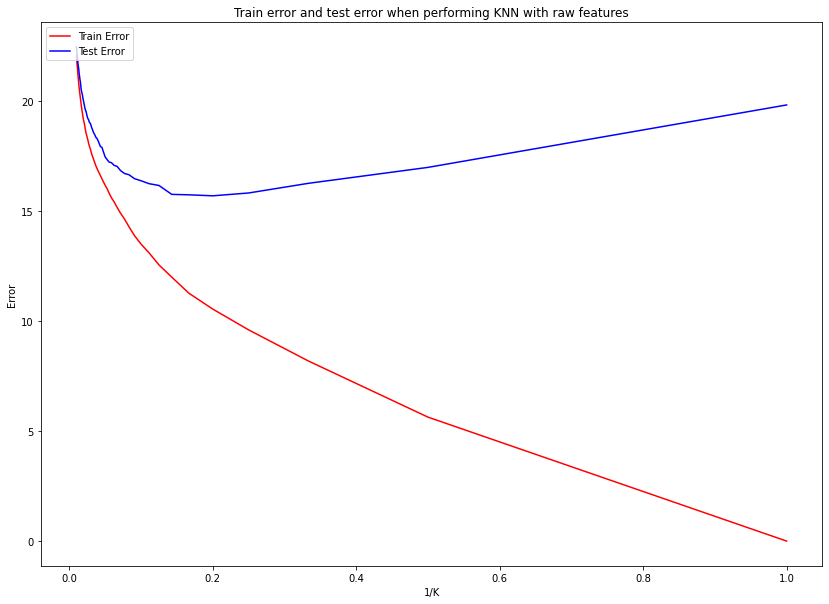

In [58]:
plt.figure(figsize=(14, 10))
plt.plot(np.array([1/k for k in range(1,101)]), mse_train_raw, color='red', ls='-')
plt.plot(np.array([1/k for k in range(1,101)]), mse_test_raw, color='blue', ls='-')
         
plt.title('Train error and test error when performing KNN with raw features')
plt.xlabel('1/K')
plt.ylabel('Error')

plt.legend(['Train Error','Test Error'],loc='upper left')

plt.show()

In [59]:
print('min test error: ', min(mse_test_raw))
optimal_k=mse_test_raw.index(min(mse_test_raw))+1
print('optimal_k:', optimal_k)

min test error:  15.704821203761764
optimal_k: 5


### Normalized features

In [60]:
min_max_scaler=preprocessing.MinMaxScaler()
X_minmax=min_max_scaler.fit_transform(X_all)
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax, y, train_size=0.7, test_size=0.3, random_state=1)

In [61]:
mse_train_nor=[]
mse_test_nor=[]

for k in range(1,101):
    knn_nor=KNeighborsRegressor(n_neighbors=k)
    knn_nor.fit(X_train_minmax, y_train_minmax) 
    y_train_pred_nor=knn_nor.predict(X_train_minmax)
    y_test_pred_nor=knn_nor.predict(X_test_minmax)

    mse_train_nor.append(mean_squared_error(y_train_minmax, y_train_pred_nor))
    mse_test_nor.append(mean_squared_error(y_test_minmax, y_test_pred_nor))

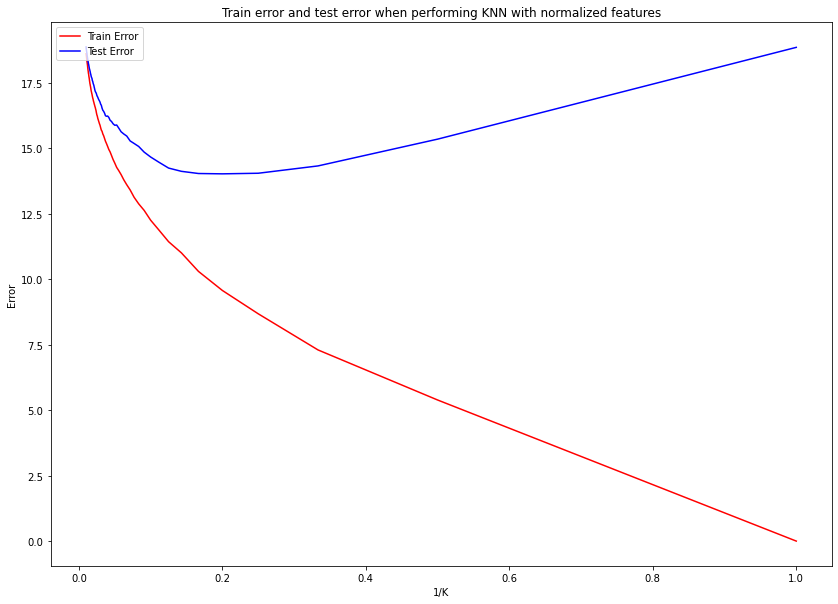

In [62]:
plt.figure(figsize=(14, 10))
plt.plot(np.array([1/k for k in range(1,101)]), mse_train_nor, color='red', ls='-')
plt.plot(np.array([1/k for k in range(1,101)]), mse_test_nor, color='blue', ls='-')
         
plt.title('Train error and test error when performing KNN with normalized features')
plt.xlabel('1/K')
plt.ylabel('Error')

plt.legend(['Train Error','Test Error'],loc='upper left')

plt.show()

In [63]:
print('min test error: ', min(mse_test_nor))
optimal_k=mse_test_nor.index(min(mse_test_nor))+1
print('optimal_k:', optimal_k)

min test error:  14.030553676071062
optimal_k: 5


## (j) Compare the results of KNN Regression with the linear regression model

KNN with normalized feature has smallest test MSE may be because in this model we performed normalization and regression model is more comfortable with normalized features.

# Part 2

## 2.4 1 For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.


(a) The sample size n is extremely large, and the number of predictors p is small.
Flexible statistical learning method is better.
Since sample size is large and predictors' number is small, the small error from sample will not influence the prediction so much and a flexible model will have better peformance.

(b) The number of predictors p is extremely large, and the number of observations n is small.
Inflexible statistical learning method is better.
Becasue the model might be overfitting and cannot perform well in a larger dataset.

(c) The relationship between the predictors and response is highly non-linear.
Flexible statistical learning method is better.
The flexible method can generate a model that are more close to the real boundary.

(d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.
Inflexible statistical learning method is better.
The flexible model will be influenced to much by the errors and cause overfitting problems.

## 2.4.7 The table below provides a training data set containing six observa- tions, three predictors, and one qualitative response variable.

(a)

obs.1: $ \sqrt{(0-0)^2+(3-0)^2+(0-0)^2}=3 $  

obs.2: $ \sqrt{(2-0)^2+(0-0)^2+(0-0)^2}=2 $  

obs.3: $ \sqrt{(0-0)^2+(1-0)^2+(3-0)^2}=\sqrt{10} $  

obs.4: $ \sqrt{(0-0)^2+(1-0)^2+(2-0)^2}=\sqrt{5} $

obs.5: $ \sqrt{(-1-0)^2+(0-0)^2+(1-0)^2}=\sqrt{2} $  

obs.6: $ \sqrt{(1-0)^2+(1-0)^2+(1-0)^2}=\sqrt{3} $ 

(b)

k=1, use the nearest 1 
obs.5 - Green
Prediction: Green

(c)

k=3, use the nearest 3:

obs.5 - Green

obs.6 - Red

obs.2 - Red

Prediction: Red (Majority polling)

(d) 

Small

Because when K is large, the boundary will be smooth and more close to linear